In [14]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
def simulate_hat_game(n):
    numbers = list(range(1, n + 1))  
    
    while len(numbers) > 1:
        a, b = random.sample(numbers, 2)  
        numbers.remove(a)
        numbers.remove(b)
        numbers.append(abs(a - b))  
    
    return numbers[0]  

simulate_hat_game(2025)

103

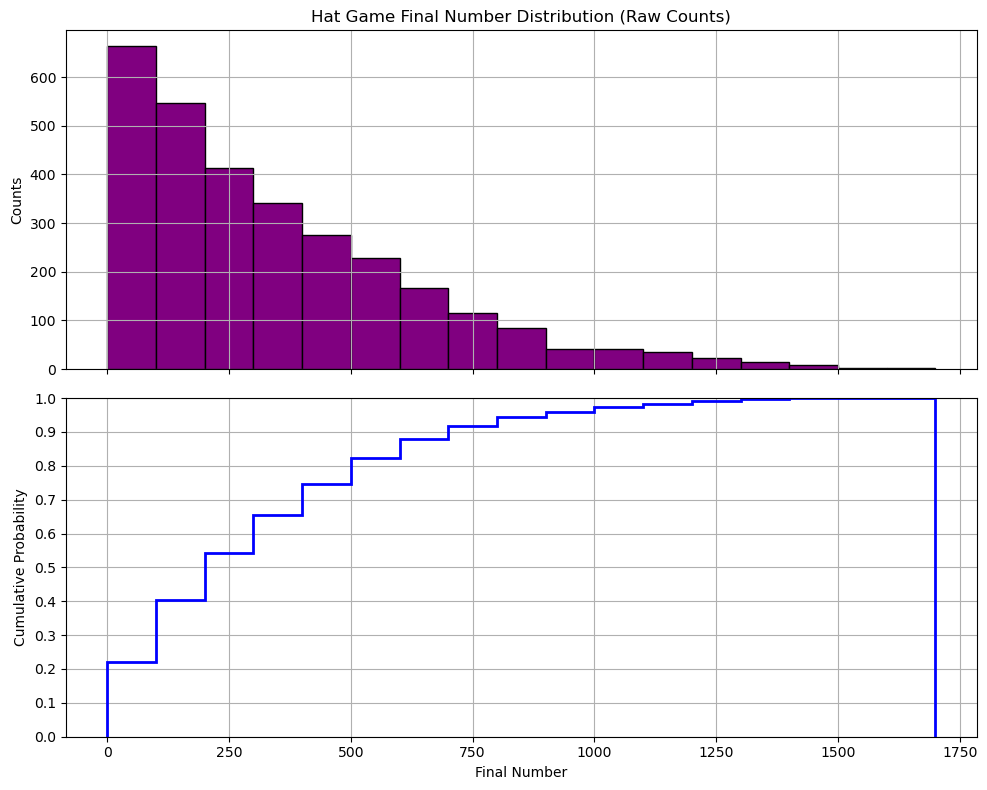

     Final Number  Occurrences
88              1           14
81              3           20
49              5           21
92              7           16
180             9           18
..            ...          ...
229          1465            1
268          1471            1
276          1545            1
494          1573            1
419          1629            2

[557 rows x 2 columns]


In [18]:

def run_simulation(n, k):
    results = [simulate_hat_game(n) for _ in range(k)]
    count_results = Counter(results)
    

    df = pd.DataFrame(count_results.items(), columns=["Final Number", "Occurrences"])
    df = df.sort_values(by="Final Number")
    return df, results


df, results = run_simulation(2025, 3000)


bins = np.arange(0, max(results) + 100, 100)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
ax1.hist(results, bins=bins, color='purple', edgecolor='black')
ax1.set_ylabel('Counts')
ax1.set_title('Hat Game Final Number Distribution (Raw Counts)')
ax1.grid(True)
plt.setp(ax1.get_xticklabels(), visible=False)

ax2.hist(results, bins=bins, cumulative=True, density=True, 
         histtype='step', color='blue', linewidth=2)
ax2.set_ylabel('Cumulative Probability')
ax2.set_xlabel('Final Number')
ax2.set_ylim([0, 1])
ax2.set_yticks(np.linspace(0, 1, 11))
ax2.grid(True)
plt.tight_layout()
plt.show()
print(df)



